# WHOMP Test on Gaussian Mixture

In [1]:
cd /Users/shizhouxu/Desktop/SX_Workspace/WHOMP

/Users/shizhouxu/Desktop/SX_Workspace/WHOMP


/Users/shizhouxu/Desktop/SX_Workspace/diverse_subgroup_env/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from WHOMP import KMeansConstrained, WHOMP_Matching, WHOMP_Random, RandomPartition, Pocock_Simon_minimization
from WHOMP_Test import logistic_regression_Gaussian_mixture_experiment, SVM_Gaussian_mixture_experiment, LinearRegression_Gaussian_mixture_experiment, Wasserstein_Gaussian_experiment, plot_kmeans_constrained, plot_whomp_random, plot_whomp_matching, plot_pocock_simon

## Visualization

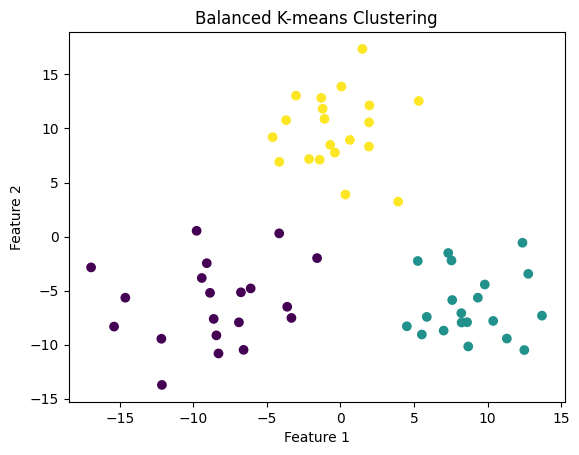

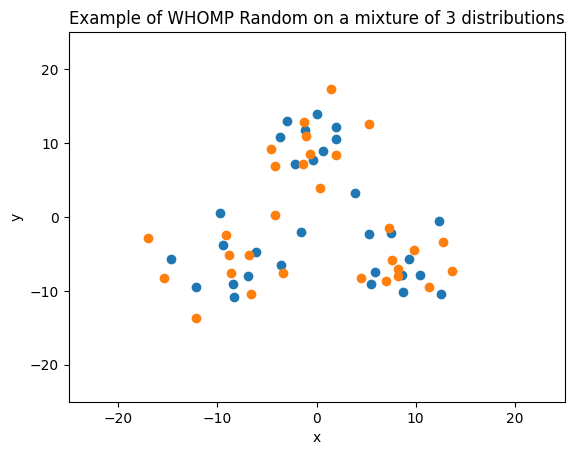

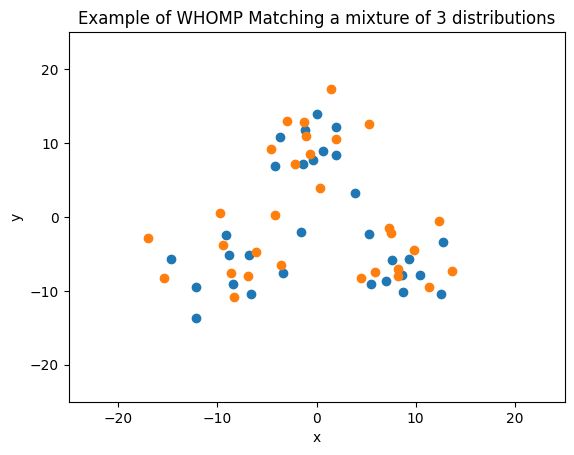

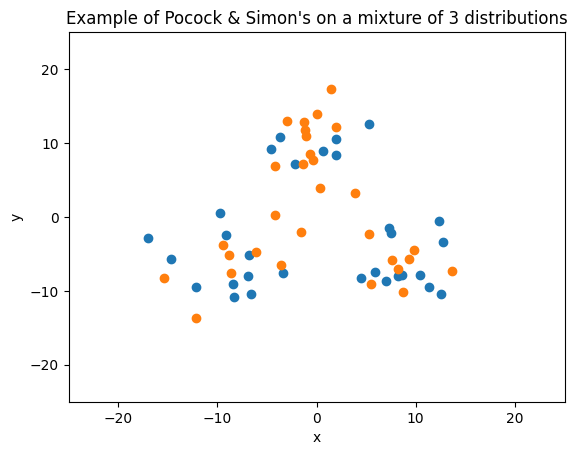

In [4]:
def run_experiment():
    # Generate the toy dataset from a mixture of Gaussians
    X_toy, truth_model = make_blobs(n_samples=60, centers=[(0, 10), (-10, -5), (10, -5)], cluster_std=[3, 3, 3])

    # Plot and visualize the results of different clustering methods
    plot_kmeans_constrained(X_toy, n_clusters=3)
    plot_whomp_random(X_toy, subgroup_number=2)
    plot_whomp_matching(X_toy, subgroup_number=2, threshold=0.0000001)
    plot_pocock_simon(X_toy, subgroup_number=2)

if __name__ == "__main__":
    run_experiment()


## Wasserstein Experiment

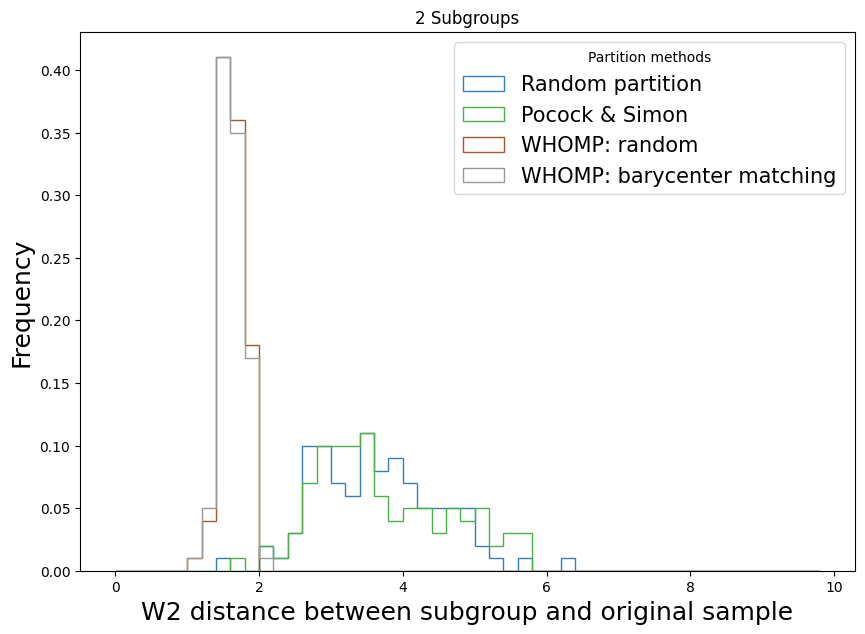

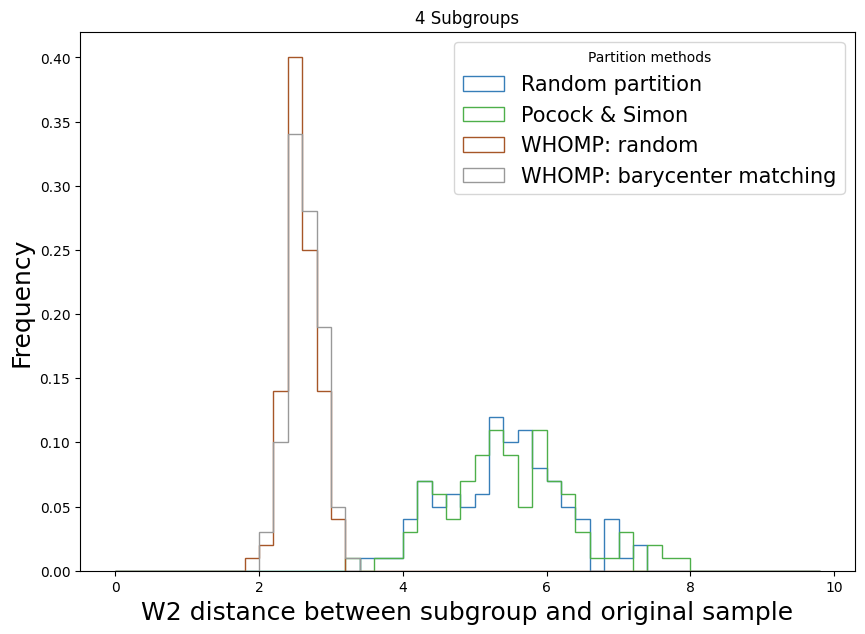

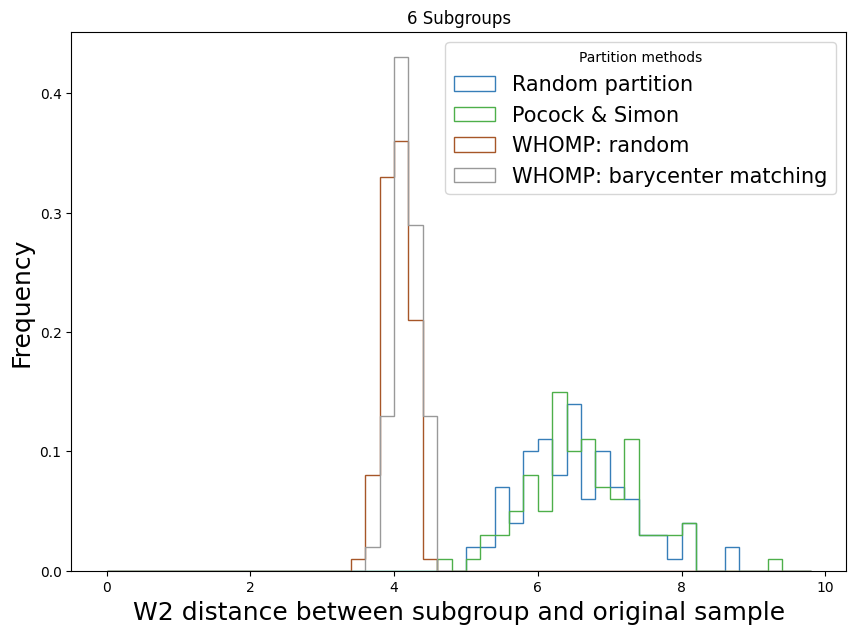


Average Errors:
Random: [3.6398428495175215, 5.416735152966089, 6.557398568189595]
Pocock & Simon: [3.7203326014418066, 5.4597724545077435, 6.6420181087636]
Anticluster: [1.6264660322303108, 2.5848898522959987, 4.036505398784219]
WHOMP Barycenter Matching: [1.6306570198611978, 2.640062279796073, 4.175071086051282]

Standard Deviations:
Random: [0.838971441558862, 0.8063918600155672, 0.7613815287854626]
Pocock & Simon: [0.9282566023735261, 0.8920362491811683, 0.7865633295669612]
Anticluster: [0.163344874764108, 0.22576894771202172, 0.16915843936690653]
WHOMP Barycenter Matching: [0.16522630707406444, 0.23096561725549708, 0.1843883094436678]


In [5]:
if __name__ == "__main__":
    # Run the experiment and print results
    random_error_ave, PS_error_ave, anticluster_error_ave, WHOMP_error_ave, random_error_std, PS_error_std, anticluster_error_std, WHOMP_error_std = Wasserstein_Gaussian_experiment()

    print("\nAverage Errors:")
    print("Random:", random_error_ave)
    print("Pocock & Simon:", PS_error_ave)
    print("Anticluster:", anticluster_error_ave)
    print("WHOMP Barycenter Matching:", WHOMP_error_ave)

    print("\nStandard Deviations:")
    print("Random:", random_error_std)
    print("Pocock & Simon:", PS_error_std)
    print("Anticluster:", anticluster_error_std)
    print("WHOMP Barycenter Matching:", WHOMP_error_std)

## Downstream Task: Logistic Regression

In [19]:
# Experiment function that runs the experiment for different subgroup numbers and repetitions
def run_logistic_regression_experiment():
    error_list = []
    std_list = []

    for i in range(3):  # Running for subgroup numbers: 2, 4, 6
        subgroup_number = (i + 1) * 2
        random_error, PS_error, WHOMP_random_error, WHOMP_matching_error = logistic_regression_Gaussian_mixture_experiment(subgroup_number, 100)

        # Append the average error rates
        error_list.append((
            np.average(random_error), 
            np.average(PS_error), 
            np.average(WHOMP_random_error), 
            np.average(WHOMP_matching_error)
        ))

        # Append the standard deviation of the error rates
        std_list.append((
            np.std(random_error), 
            np.std(PS_error), 
            np.std(WHOMP_random_error), 
            np.std(WHOMP_matching_error)
        ))

    # Output the results
    print("Average Errors:")
    for i in range(3):
        print(f"Subgroup {i+1} - Random: {error_list[i][0]}, PS: {error_list[i][1]}, WHOMP Random: {error_list[i][2]}, WHOMP Matching: {error_list[i][3]}")

    print("\nStandard Deviations:")
    for i in range(3):
        print(f"Subgroup {i+1} - Random: {std_list[i][0]}, PS: {std_list[i][1]}, WHOMP Random: {std_list[i][2]}, WHOMP Matching: {std_list[i][3]}")

if __name__ == "__main__":
    run_logistic_regression_experiment()

Average Errors:
Subgroup 1 - Random: 0.9830000000000001, PS: 0.9803333333333336, WHOMP Random: 0.9846666666666667, WHOMP Matching: 0.9823333333333334
Subgroup 2 - Random: 0.9673333333333334, PS: 0.9766666666666669, WHOMP Random: 0.9800000000000001, WHOMP Matching: 0.9820000000000002
Subgroup 3 - Random: 0.9580000000000001, PS: 0.963, WHOMP Random: 0.9860000000000002, WHOMP Matching: 0.9840000000000001

Standard Deviations:
Subgroup 1 - Random: 0.018556220879622373, PS: 0.02005270832359337, WHOMP Random: 0.016613247725836146, WHOMP Matching: 0.016636639617957038
Subgroup 2 - Random: 0.057731177788859354, PS: 0.03574601764921202, WHOMP Random: 0.030550504633038923, WHOMP Matching: 0.029597297173897478
Subgroup 3 - Random: 0.07507329751649383, PS: 0.06731270311018567, WHOMP Random: 0.037469987990390384, WHOMP Matching: 0.03666060555964672


## Downstream Task: SVM

In [6]:
# Main function to run SVM Gaussian mixture experiment across different subgroup numbers
def run_SVM_experiment():
    error_list_SVM = []
    std_list_SVM = []

    for i in range(3):  # Running for subgroup numbers: 2, 4, 6
        subgroup_number = (i + 1) * 2
        random_error, PS_error, WHOMP_random_error, WHOMP_matching_error = SVM_Gaussian_mixture_experiment(subgroup_number, 100)

        # Append the average error rates
        error_list_SVM.append((
            np.average(random_error), 
            np.average(PS_error), 
            np.average(WHOMP_random_error), 
            np.average(WHOMP_matching_error)
        ))

        # Append the standard deviation of the error rates
        std_list_SVM.append((
            np.std(random_error), 
            np.std(PS_error), 
            np.std(WHOMP_random_error), 
            np.std(WHOMP_matching_error)
        ))

    # Output the results
    print("Average Errors:")
    for i in range(3):
        print(f"Subgroup {i+1} - Random: {error_list_SVM[i][0]}, PS: {error_list_SVM[i][1]}, WHOMP Random: {error_list_SVM[i][2]}, WHOMP Matching: {error_list_SVM[i][3]}")

    print("\nStandard Deviations:")
    for i in range(3):
        print(f"Subgroup {i+1} - Random: {std_list_SVM[i][0]}, PS: {std_list_SVM[i][1]}, WHOMP Random: {std_list_SVM[i][2]}, WHOMP Matching: {std_list_SVM[i][3]}")

if __name__ == "__main__":
    run_SVM_experiment()

Average Errors:
Subgroup 1 - Random: 1.0, PS: 1.0, WHOMP Random: 1.0, WHOMP Matching: 1.0
Subgroup 2 - Random: 0.9973333333333333, PS: 0.9973333333333333, WHOMP Random: 1.0, WHOMP Matching: 1.0
Subgroup 3 - Random: 0.983, PS: 0.9590000000000001, WHOMP Random: 0.9990000000000001, WHOMP Matching: 1.0

Standard Deviations:
Subgroup 1 - Random: 0.0, PS: 0.0, WHOMP Random: 0.0, WHOMP Matching: 0.0
Subgroup 2 - Random: 0.020912516188477486, PS: 0.02091251618847749, WHOMP Random: 0.0, WHOMP Matching: 0.0
Subgroup 3 - Random: 0.06333245613427604, PS: 0.11497391008398385, WHOMP Random: 0.009949874371066194, WHOMP Matching: 0.0


## Downstream Task: Linear Regression

In [5]:
# Main function to run Linear Regression Gaussian mixture experiment across different subgroup numbers
def run_LR_experiment():
    error_list_LR = []
    std_list_LR = []

    for i in range(3):  # Running for subgroup numbers: 2, 4, 6
        subgroup_number = (i + 1) * 2
        random_error, PS_error, WHOMP_random_error, WHOMP_matching_error = LinearRegression_Gaussian_mixture_experiment(subgroup_number, 100)

        # Append the average error rates
        error_list_LR.append((
            np.average(random_error), 
            np.average(PS_error), 
            np.average(WHOMP_random_error), 
            np.average(WHOMP_matching_error)
        ))

        # Append the standard deviation of the error rates
        std_list_LR.append((
            np.std(random_error), 
            np.std(PS_error), 
            np.std(WHOMP_random_error), 
            np.std(WHOMP_matching_error)
        ))

    # Output the results
    print("Average Errors:")
    for i in range(3):
        print(f"Subgroup {i+1} - Random: {error_list_LR[i][0]}, PS: {error_list_LR[i][1]}, WHOMP Random: {error_list_LR[i][2]}, WHOMP Matching: {error_list_LR[i][3]}")

    print("\nStandard Deviations:")
    for i in range(3):
        print(f"Subgroup {i+1} - Random: {std_list_LR[i][0]}, PS: {std_list_LR[i][1]}, WHOMP Random: {std_list_LR[i][2]}, WHOMP Matching: {std_list_LR[i][3]}")

if __name__ == "__main__":
    run_LR_experiment()

Average Errors:
Subgroup 1 - Random: 1.3371052254254534, PS: 1.34198039770893, WHOMP Random: 1.2862921837298311, WHOMP Matching: 1.3135448219122932
Subgroup 2 - Random: 1.8962909604886697, PS: 1.9942930420984013, WHOMP Random: 1.8428231875499537, WHOMP Matching: 1.8736665937655061
Subgroup 3 - Random: 2.4033099300683913, PS: 2.530355886454593, WHOMP Random: 2.273761742141599, WHOMP Matching: 2.2911400858440785

Standard Deviations:
Subgroup 1 - Random: 0.1009100651368645, PS: 0.11641335636456193, WHOMP Random: 0.05811504721593816, WHOMP Matching: 0.08378518426134017
Subgroup 2 - Random: 0.2694403720694815, PS: 0.27596320458615003, WHOMP Random: 0.16527259871240596, WHOMP Matching: 0.16625093576316793
Subgroup 3 - Random: 0.48355613352320226, PS: 0.7391637143436561, WHOMP Random: 0.20508084348653788, WHOMP Matching: 0.2182970629724256
